In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as plx

In [4]:
df = pd.read_csv('winequality-red.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
X_feature_names = [i for i in df.columns if df[i].dtype in [np.float]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [7]:
print(X_feature_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [8]:
Y_feature_names = [i for i in df.columns if df[i].dtype in [np.int64]]

In [9]:
print(Y_feature_names)

['quality']


In [10]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


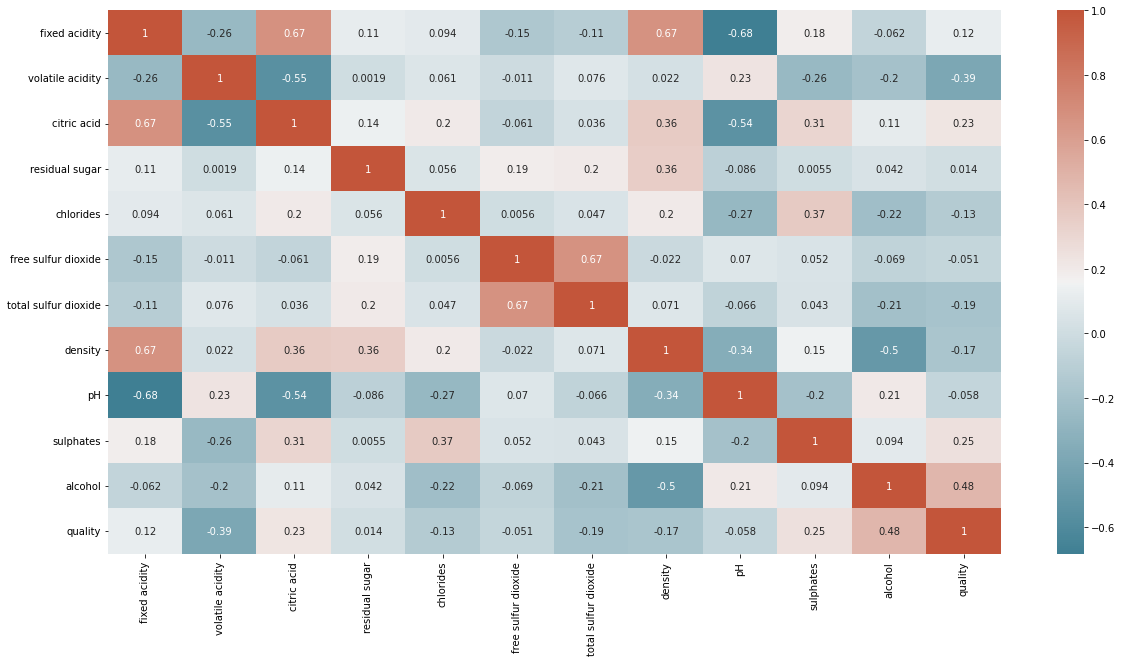

In [11]:
corr = df.corr()
plt.pyplot.subplots(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, cmap=sns.diverging_palette(220,20, as_cmap=True))

In [12]:
#set value 1 for all tiems in quality column greater than 7 (good) otherwise, set as 0 (bad)
df['goodquality'] = [1 if x>=7 else 0 for x in df['quality']]

In [13]:
#set Y as good quality column, which will be used for classification
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [14]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [15]:
#Normalize Data
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [16]:
#Train Test Splitting

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state= 0)

In [17]:
Y_test.value_counts()

0    430
1     50
Name: goodquality, dtype: int64

In [18]:
def print_accuracy(f):
  print("Accuracy = {0}%".format(100*np.sum(f(X_test)==Y_test)/len(Y_test)))

In [19]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(random_state=0)
rforest.fit(X_train, Y_train)
print_accuracy(rforest.predict)

Accuracy = 92.70833333333333%


In [20]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(activation='relu', hidden_layer_sizes=(5,2),max_iter=20000, random_state=0)
nn.fit(X_train, Y_train)
print_accuracy(nn.predict)

Accuracy = 89.375%


In [21]:
import sklearn.tree
dtree = sklearn.tree.DecisionTreeClassifier(min_samples_split=2, random_state=0)
dtree.fit(X_train, Y_train)
print_accuracy(dtree.predict)

Accuracy = 89.58333333333333%
